In [5]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

# 1-Qubit-Quantum-Zufallsgenerator
qc = QuantumCircuit(1, 1)      # Ein Qubit, ein klassisches Bit
qc.h(0)                        # Hadamard-Gatter -> Superposition
qc.measure(0, 0)               # Messung in Z-Basis

# Simulation
simulator = FakeAlmadenV2()
shots = 10
job = simulator.run(qc, shots=shots)  # Nur zehn Schuss für ein Zufallsbit
result = job.result()
counts = result.get_counts()

# Extraktion der Bits
random_bits = []
for bitstring in counts:
        random_bits.extend([int(b) for b in bitstring] * counts[bitstring])

print("Zufallsbits:", random_bits)


Zufallsbits: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


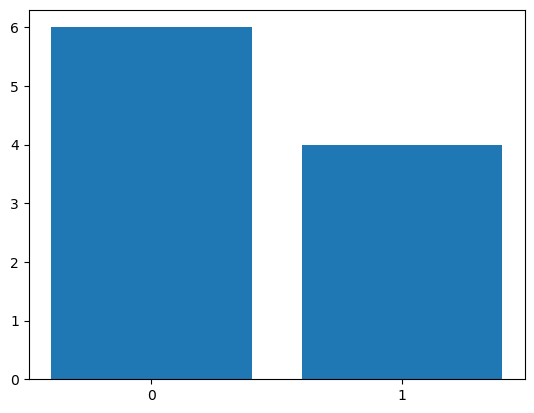

In [6]:
from matplotlib import pyplot as plt
counter0 = random_bits.count(0)
counter1 = random_bits.count(1)
counter = [counter0, counter1]
    
names = ["0", "1"]
plt.bar(names, counter)
plt.show()

In [31]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
simulator = FakeAlmadenV2()
shots = 5000

# 1-Qubit-Quantum-Zufallsgenerator
qc = QuantumCircuit(1, 1)      # Ein Qubit, ein klassisches Bit
qc.h(0)                        # Hadamard-Gatter -> Superposition
qc.measure(0, 0) 

gesamt_counter0 = 0
gesamt_counter1 = 0

for i in range(0, 10000):
    job = simulator.run(qc, shots=shots)  # Nur zehn Schuss für ein Zufallsbit
    result = job.result()
    counts = result.get_counts()
    for bitstring, anzahl in counts.items():
        for bit in bitstring:
            if bit == '0':
                gesamt_counter0 += anzahl
            elif bit == '1':
                gesamt_counter1 += anzahl

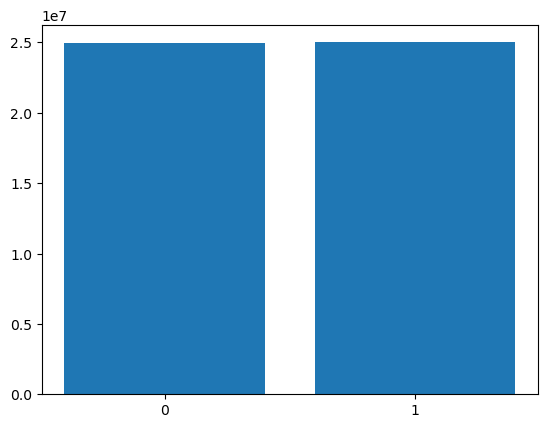

[24991681, 25008319]


In [32]:
from matplotlib import pyplot as plt
names = ["0", "1"]
counte = [gesamt_counter0, gesamt_counter1]
plt.bar(names, counte)
plt.show()
print(counte)